In [1]:
import gstlearn as gl
import gstlearn.plot as gp
import os
import requests

In [2]:
url = 'http://rgeostats.free.fr/doc/Files/Scotland_Temperatures.csv'
r = requests.get(url, allow_redirects=True)

In [3]:
filepath = 'Scotland_Temperatures.csv'
open(filepath, 'wb').write(r.content)

4287

In [4]:
#help(gl.CSVformat)
csvf = gl.CSVformat()
csvf.setCharDec('.')
mydb = gl.Db.createFromCSV(filepath, verbose = False, csv = csvf) # URL ?
type(mydb)
mydb
# A priori : existant OK (classe de paramètres)
# => Faire en sorte que createFromCSV soit "kwargable" (Done)
# => Deplacer verbose (fin de liste) et mettre une valeur par defaut. (Done).
# (Note: Attention la programmation en C++ (ou les arguments ne sont pas nommables)
# preconise de ne pas placer les arguments les plus utiles trop loin dans la liste)


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 0
Number of Columns            = 5
Maximum Number of UIDs       = 5
Total number of samples      = 236

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = NA
Column = 2 - Name = Latitude - Locator = NA
Column = 3 - Name = Elevation - Locator = NA
Column = 4 - Name = January_temp - Locator = NA

In [5]:
#help(gl.Db.display)
dbfmt = gl.DbStringFormat()
dbfmt.setParams(gl.FLAG_VARS | gl.FLAG_STATS)
dbfmt.setCols([1,2]) # 0 is the rank
mydb.display(dbfmt)
#mydb.display()

# => A rendre disponible :
#mydb.display(gl.DbStringFormat(flags = gl.FLAG_VARS))  # Done
# => Formatage sous forme HTML (tableau)

# => DbStringFormat::setCols à renommer en setFields # Non: on garde 'Cols' 
# en remplacement de 'Fields' partout.


Data Base Characteristics

Data Base Statistics
--------------------
2 - Name Longitude - Locator NA
 Nb of data          =        236
 Nb of active values =        236
 Minimum value       =     78.200
 Maximum value       =    460.700
 Mean value          =    282.487
 Standard Deviation  =     71.704
 Variance            =   5141.440
3 - Name Latitude - Locator NA
 Nb of data          =        236
 Nb of active values =        236
 Minimum value       =    530.400
 Maximum value       =   1208.900
 Mean value          =    747.739
 Standard Deviation  =    121.901
 Variance            =  14859.915

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = NA
Column = 2 - Name = Latitude - Locator = NA
Column = 3 - Name = Elevation - Locator = NA
Column = 4 - Name = January_temp - Locator = NA
 

In [6]:
mydb


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 0
Number of Columns            = 5
Maximum Number of UIDs       = 5
Total number of samples      = 236

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = NA
Column = 2 - Name = Latitude - Locator = NA
Column = 3 - Name = Elevation - Locator = NA
Column = 4 - Name = January_temp - Locator = NA

In [7]:
err = mydb.setLocator("January*",gl.ELoc.Z)
err = mydb.setLocator("Elevation",gl.ELoc.Z,1)
#mydb.display()
mydb[4,:] 
#mydb.getLocators(False,gl.ELoc.Z) 

array([  5. , 326.8, 691.2,  32. ,   3.1])

In [ ]:
# Vocabulaire :
# => Rank : 1-based
# => Index : 0-based
# => Column : à comprendre comme "Column Index"

# Désignation des variables (actuellement) :
# => Par Nom (univoque)
# => Par Locator ("z", ...)
# => Par Field (rang [1-based] affiché par le display)
# => Par Attribut (indice [0-based] qui ne fait que croitre
#                  (lorsqu'on ajoute des variables) et qui ne change
#                  jamais pour les variables existantes)

# Dans le futur :  => Done
# => Par Nom (univoque)
# => Par Locator (gl.ELoc.Z, locatorIndex)
# => Par Column ([0-based] affiché par le display)
# => Par UID (Unique identifier)

# Nettoyer la classe Db : => Done
# => Ajouter la fonction setLocatorByColumn => Done

# Conséquence pour Db::addFields (renommé en addColumns) => Done
# => On renvoie une liste de uid => TODO
# => On crée une méthode addField qui renvoie un seul uid (renommée addColumn) => Done

# Conséquence sur les Locators :
# => Idem, les locators index doivent démarrer à l'indice '0' (mais l'affichage reste x1 x2 etc...)

# Operateur crochet de Db : => Done
# => Accéder par locator (déjà possible pour extraire les colonnes : mydb[gl.ELoc.Z]
# => Accès par ligne et/ou par colonne (index, locator (all), names) => Done
# => Corriger la transposition => Done
# => Gérer les valeurs tests => Done

In [ ]:
# Ajout d'une variable (actuellement)
#mydb["new_var"] = [1,2,3]
#mydb.seLocator("new_var", glELoc.Z)
# => A remplacer par ?
#mydb["new_var", gl.ELoc.Z] = [1,2,3]

# Si un seul argument nom dans [] => nom de variable
# Si un seul argument integer dans [] => indice de variable
# Si on veut toutes les variables du second échantillon, on fait :
#mydb[1,:]

# On veut pouvoir faire cela :
#idx = [5,8,10]
#mydb[idx,"Elevation"] = 1000
# Ou meme :
# mydb[[5,8,10],3] = 1000

In [12]:
mydb.setLocators(["Long*", "Lat*"],gl.ELoc.X)
mydb


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 5
Maximum Number of UIDs       = 5
Total number of samples      = 236

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = x1
Column = 2 - Name = Latitude - Locator = x2
Column = 3 - Name = Elevation - Locator = z2
Column = 4 - Name = January_temp - Locator = z1

<AxesSubplot:>

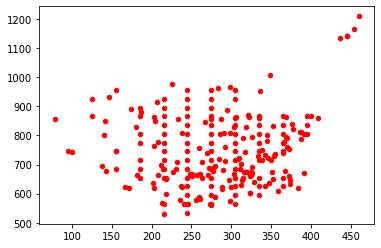

In [13]:
gp.point(mydb)

In [14]:
# Serialization
mydb.dumpToNF("DbNeutral.ascii")

0

In [15]:
# Deserialization
mydb2 = gl.Db.createFromNF("DbNeutral.ascii")

<AxesSubplot:>

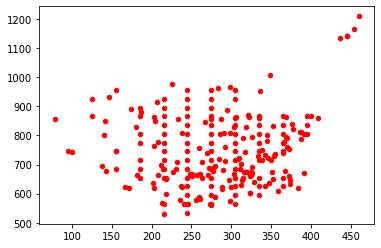

In [16]:
gp.point(mydb2)

In [17]:
mydb2
# Still a problem for the rank that is duplicated after deserialization


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 6
Maximum Number of UIDs       = 6
Total number of samples      = 236

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = rank.1 - Locator = NA
Column = 2 - Name = Longitude - Locator = x1
Column = 3 - Name = Latitude - Locator = x2
Column = 4 - Name = Elevation - Locator = z2
Column = 5 - Name = January_temp - Locator = z1